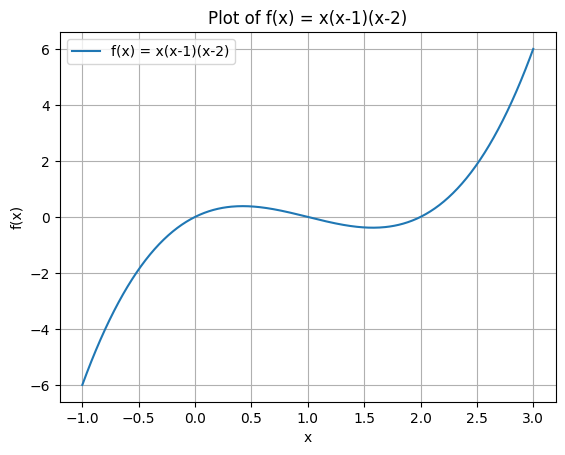

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x(x-1)(x-2)
def f(x):
    return x * (x - 1) * (x - 2)

# Generate x values
x = np.linspace(-1, 3, 400)

# Compute y values
y = f(x)

# Plot the function
plt.plot(x, y, label='f(x) = x(x-1)(x-2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x(x-1)(x-2)')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Parameters for Euler and Midpoint methods
dt = 0.01  # time step for simulations
time_steps = 1000  # number of time steps
MAX_VAL = 1e6 # maximum allowable value to avoid overflow

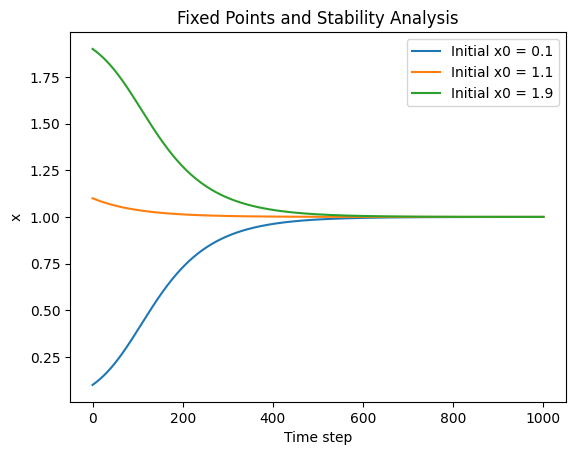

In [70]:
## Task 1: Fixed points and stability analysis

def euler_method(f, x0, dt, steps):
    x_values = [x0]
    for _ in range(steps):
        x_values.append(x_values[-1] + dt * f(x_values[-1]))
    return x_values

# Initial conditions around fixed points
initial_conditions = [0.1, 1.1, 1.9]  # values near 0, 1, and 2
for x0 in initial_conditions:
    x_values = euler_method(f, x0, dt, time_steps)
    plt.plot(x_values, label=f'Initial x0 = {x0}')
plt.title("Fixed Points and Stability Analysis")
plt.xlabel("Time step")
plt.ylabel("x")
plt.legend()
plt.show()

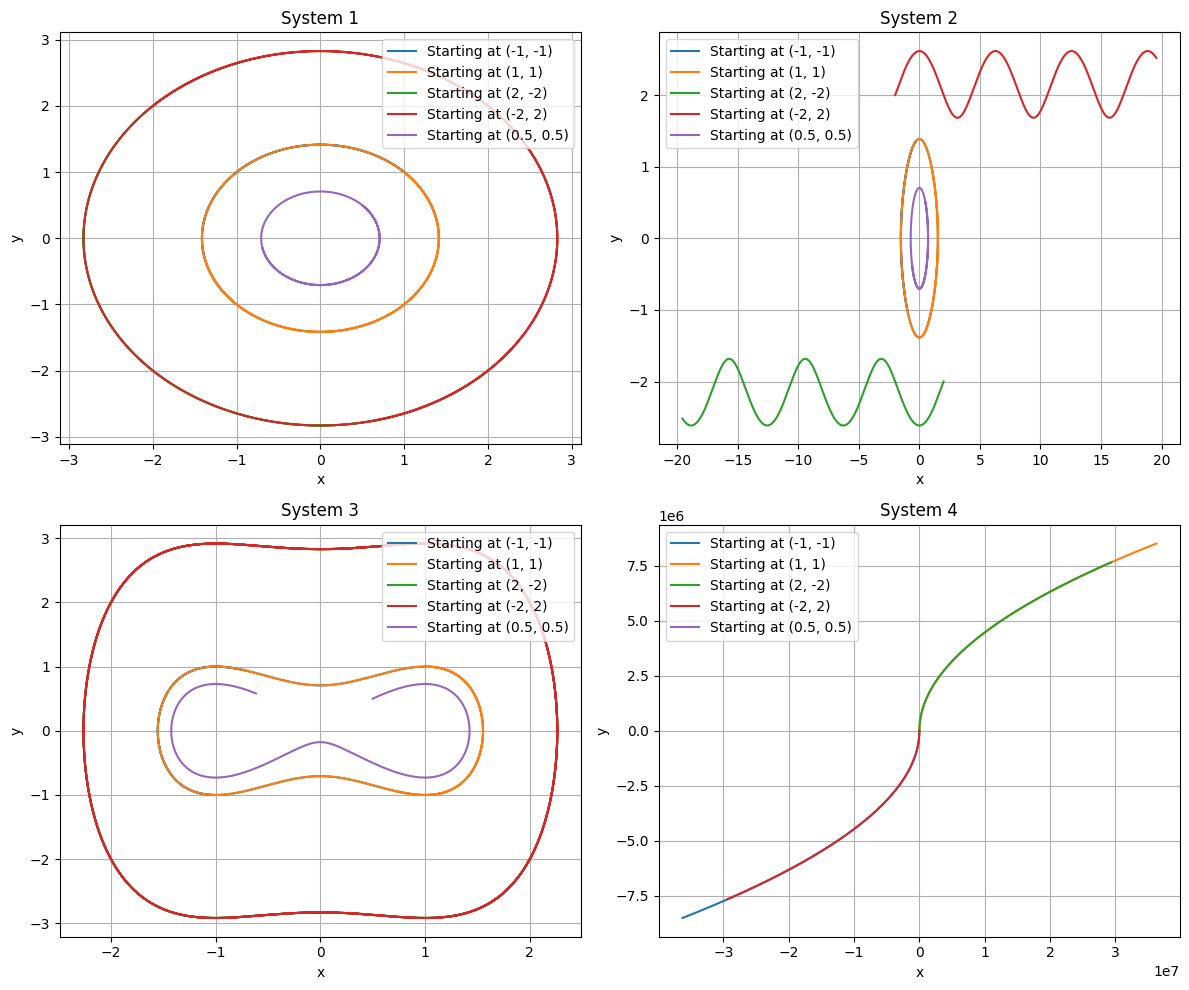

In [71]:
## Task 2: Phase portraits for various equations
def capped_value(val, max_val=MAX_VAL):
    return max(min(val, max_val), -max_val)

# Midpoint method implementation for simulating the system
def midpoint_method(fx, fy, x0, y0, dt, time_steps):
    trajectory_x = [x0]
    trajectory_y = [y0]
    x, y = x0, y0
    
    for _ in range(time_steps):
        kx = dt * fx(x, y)
        ky = dt * fy(x, y)
        
        x_next = x + dt * fx(x + kx / 2, y + ky / 2)
        y_next = y + dt * fy(x + kx / 2, y + ky / 2)
        
        x, y = x_next, y_next
        trajectory_x.append(x)
        trajectory_y.append(y)
    
    return trajectory_x, trajectory_y

# System definitions
def fx1(x, y): return y
def fy1(x, y): return -x

def fx2(x, y): return y
def fy2(x, y): return -np.sin(x)

def fx3(x, y): return y
def fy3(x, y): return capped_value(x - x**3)

def fx4(x, y): return y
def fy4(x, y): return capped_value(-x + x**3)

# List of systems
systems = [(fx1, fy1), (fx2, fy2), (fx3, fy3), (fx4, fy4)]

# Initial conditions
initial_conditions = [(-1, -1), (1, 1), (2, -2), (-2, 2), (0.5, 0.5)]

# 2x2 Plot for phase portraits of each system
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easy iteration

for i, ((fx, fy), ax) in enumerate(zip(systems, axes), start=1):
    for x0, y0 in initial_conditions:
        traj_x, traj_y = midpoint_method(fx, fy, x0, y0, dt, time_steps)
        ax.plot(traj_x, traj_y, label=f'Starting at ({x0}, {y0})')
    ax.set_title(f"System {i}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

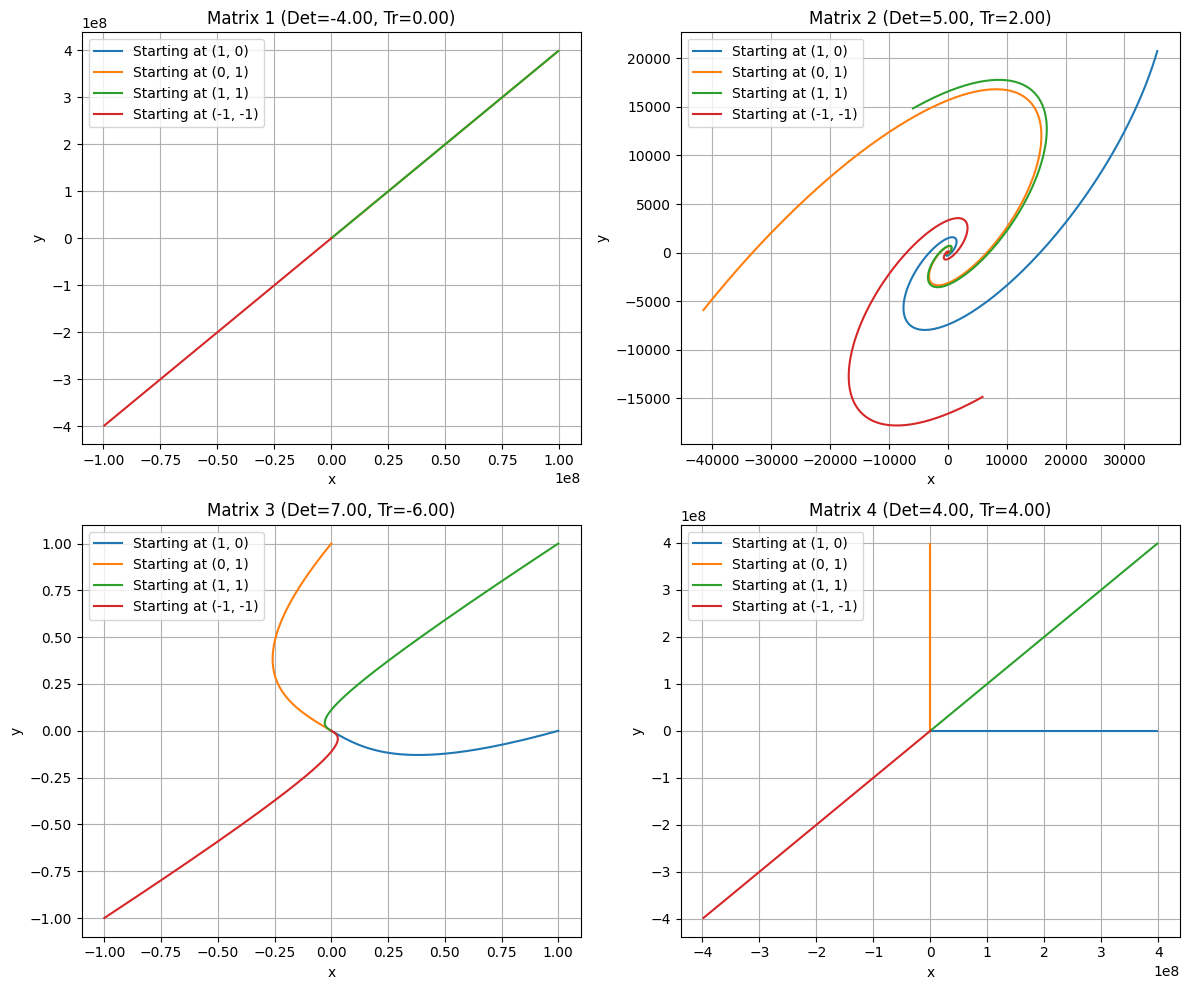

In [72]:
## Task 3: Phase portraits for linear system x' = Ax with 2x2 subplot layout
# Define matrices for linear systems
matrices = [
    np.array([[-2, 1], [0, 2]]),
    np.array([[3, -4], [2, -1]]),
    np.array([[-3, -2], [-1, -3]]),
    np.array([[2, 0], [0, 2]])
]

# Function for simulating phase portraits for linear systems
def linear_phase_portrait(A, x0, y0, steps, dt):
    x, y = x0, y0
    trajectory_x, trajectory_y = [x0], [y0]
    for _ in range(steps):
        dx, dy = A @ np.array([x, y])
        x += dx * dt
        y += dy * dt
        trajectory_x.append(x)
        trajectory_y.append(y)
    return trajectory_x, trajectory_y

# Initial conditions for phase portrait
initial_conditions = [(1, 0), (0, 1), (1, 1), (-1, -1)]

# Create 2x2 plot matrix for the four matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easy iteration

for i, (A, ax) in enumerate(zip(matrices, axes), start=1):
    for x0, y0 in initial_conditions:
        traj_x, traj_y = linear_phase_portrait(A, x0, y0, time_steps, dt)
        ax.plot(traj_x, traj_y, label=f'Starting at ({x0}, {y0})')
    det, trace = np.linalg.det(A), np.trace(A)
    ax.set_title(f"Matrix {i} (Det={det:.2f}, Tr={trace:.2f})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

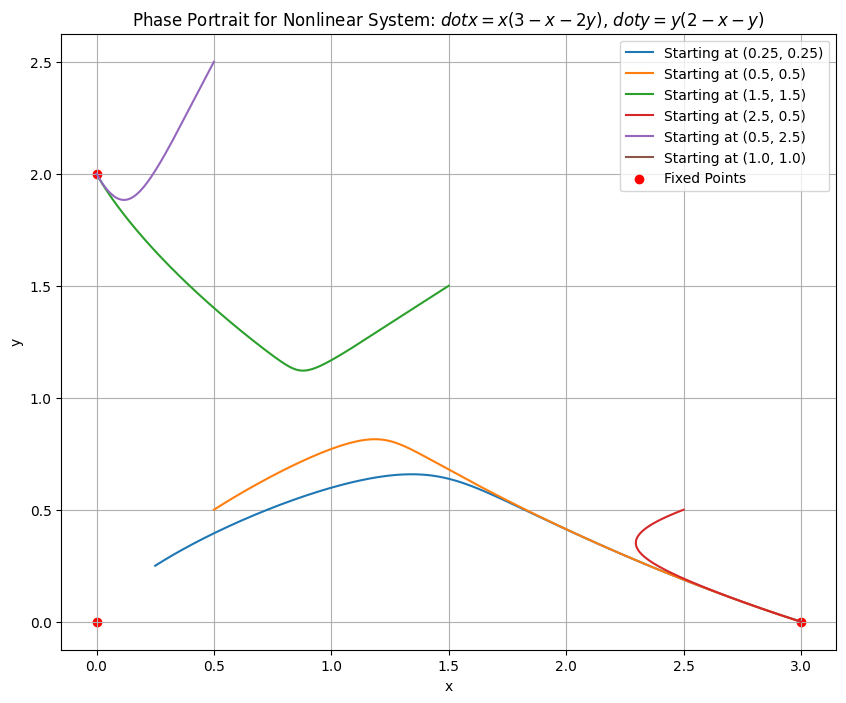

In [ ]:
## Task 4: Nonlinear system and modified Lotka-Volterra model
# Define the nonlinear system
def fx(x, y):
    return x * (3 - x - 2 * y)

def fy(x, y):
    return y * (2 - x - y)

# Set of initial conditions for phase portrait
initial_conditions = [(0.5, 0.5), (1.5, 1.5), (2.5, 0.5), (0.5, 2.5), (1.0, 1.0)]

# Plotting phase portrait
plt.figure(figsize=(10, 8))
for x0, y0 in initial_conditions:
    traj_x, traj_y = midpoint_method(fx, fy, x0, y0, dt, time_steps)
    plt.plot(traj_x, traj_y, label=f'Starting at ({x0}, {y0})')

# Fixed points
plt.scatter([0, 3, 0], [0, 0, 2], color='red', label='Fixed Points')

# Labeling the plot
plt.title("Phase Portrait for Nonlinear System: $dot{x} = x(3 - x - 2y)$, $dot{y} = y(2 - x - y)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()